# Name: Abhay Swarnkar

# The Sparks Foundation-Grip:- Data Science and Business Analytics 

# Task 1: Prediction using Supervised Machine Learning


## Author - Abhay Swarnkar

## Dataset used: Student Scores
      (*) It can be downloaded through the following link-http://bit.ly/w-data

# Problem statement(s):

(*) Predict the Percentage of a student based on the no. of study hours.


(*) What will be predicted score if a student studies for 9.25hrs/day?

# Steps
### Step :1- Importing Python Package and Read CSV File 
### Step :2- Visuallizing the Dataset
### Step :3- Data preparation
### Setp :4- Training the algorithm
### Step :5- Marking Predictions
### Step :6- Evaluation

# Step 1 - Importing Python Package and read CSV File

  ## Imoprt Python Package

In [29]:
import pandas as pd   
import matplotlib.pyplot as plt 
import numpy as np

Read CSV File (comma-separated values (CSV)  )

In [30]:
df=pd.read_csv('csv.csv')# read file .csv
print("Shape of DataFrame->",df.shape)# shape of data set


Shape of DataFrame-> (25, 2)


In [31]:
df.head() # print some data set from head section


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
df.tail() # print some data set from tail section

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [33]:
df.isnull().sum() # check value, that's do'nt have mising value

Hours     0
Scores    0
dtype: int64

In [34]:
df.info() # This tell us whose  datatype use in data set, In this scenario use two type of data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [35]:
df.describe() # describe data set as values mean , min, max etc

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


  # Step 2 - Data Visualization  

To plot the dataset and check the relation between the variables.
#### Now let's plot our data points on 2-D  Graph to eyeball our data set and see if we can manully find any relationship between the data. We can create the plot with following script:

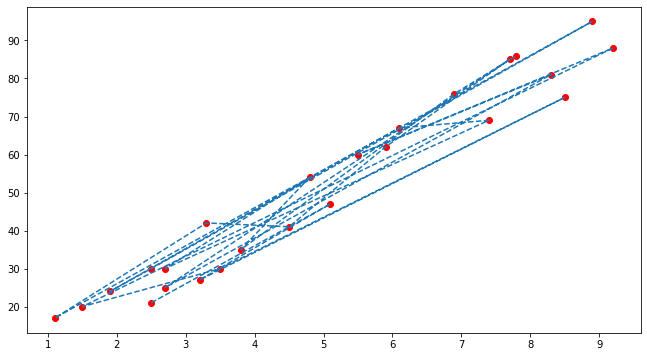

In [50]:
x,y=df['Hours'],df['Scores']
plt.scatter(x,y,marker="o",color='red')
plt.plot(x,y,linestyle='--')

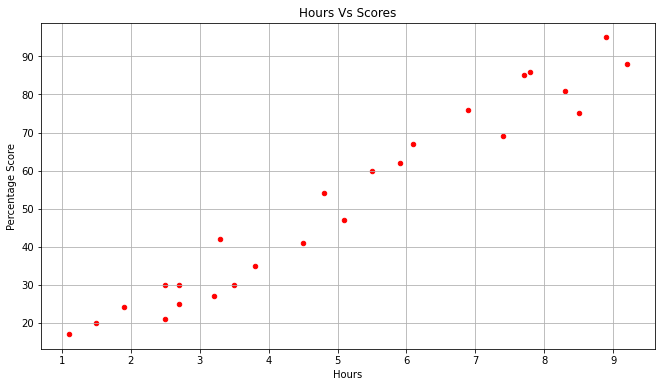

In [37]:
# plotting distribution of graph
plt.rcParams["figure.figsize"]=[11,6]
df.plot(kind='scatter',x='Hours',y='Scores',style='O',color='red') # plot graph use scatter 
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

From this we clearly observe positive linear the relation between the variable, hours studies and percentage scored. The percentage score increases as the hours studies increased

# Step 3 - Data Preparation 

The next setp is to divide the data into 'attbutes' (inputs ) and 'lables'(output)

In [55]:
X=df.iloc[:,:1].values#spliting the data using iloc function.
y=df.iloc[:,1:].values

In [53]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [67]:
#spliting the data into training and testing data 
# import sklearn , skelearn package of python 
from sklearn.model_selection import train_test_split
X_train, x_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Setp 4 - Training the Algorithm

We have split our data into training and testing sets and now is finally the time to train our algorithm

In [68]:
# import sklearn , skelearn package of python have Machine learning model Linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Training Finish ")

Training Finish 


 ### visulizing Data Model

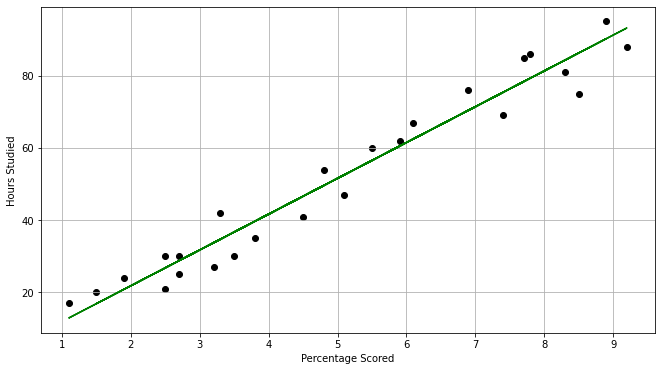

In [78]:
#Plotting the regression line 
line =model.coef_*X+model.intercept_
#plotting for the test data
plt.rcParams['figure.figsize']=[11,6] 
plt.scatter(X,y,color='black')
plt.plot(X,line,color='green')
plt.xlabel("Percentage Scored")
plt.ylabel("Hours Studied")
plt.grid()

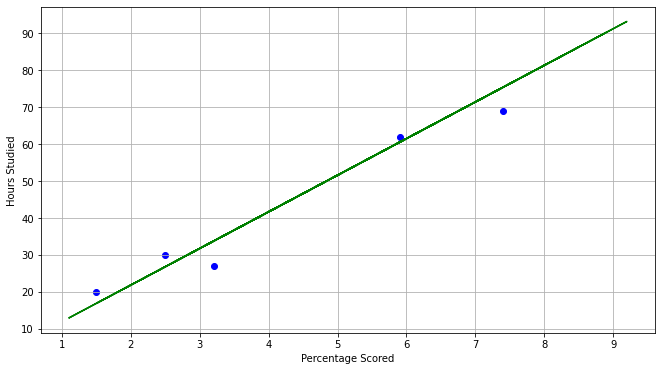

In [82]:
plt.rcParams['figure.figsize']=[11,6] 
plt.scatter(x_test,y_test,color='blue')
plt.plot(X,line,color='green')
plt.xlabel("Percentage Scored")
plt.ylabel("Hours Studied")
plt.grid()

## Step 5 - Making Predictions 

Now that we have trained our algorithm, it's to  make some predictions

In [87]:
print(x_test)#testing data (in hours)
y_pred = model.predict(x_test) # Prediction int scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [88]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [89]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [94]:
# Comparing Actual vs Predicted
com_df=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
com_df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [110]:
# Prediction our data as given
hours=9.25
own_pred=model.predict([[hours]])
print("No of Hours={}".format([[hours]]))
print("predicted Score={}".format(own_pred[0]))

No of Hours=[[9.25]]
predicted Score=[93.69173249]


# Step 6 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [112]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
